<a href="https://colab.research.google.com/github/Raexann/Machine-Learning/blob/main/SVM_with_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv("/content/titanic.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

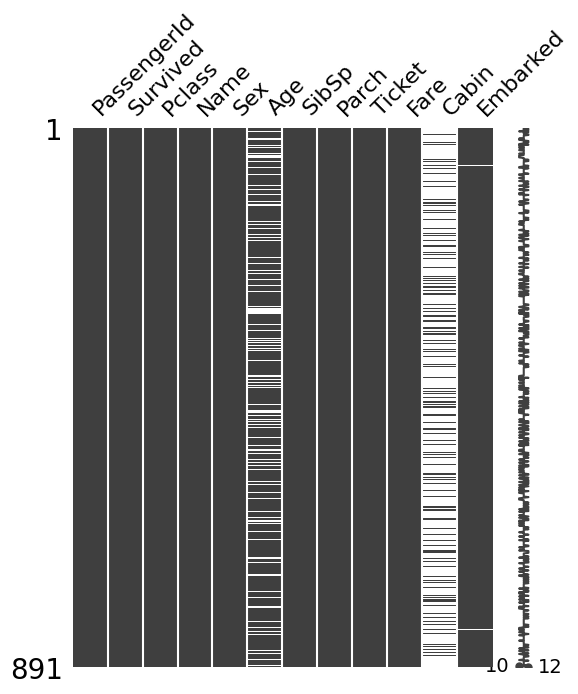

In [9]:
import missingno as msno
msno.matrix(data,figsize=(6,7))

In [10]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#data preparation

#filling na
data['Cabin']=data["Cabin"].fillna(0)

mean=np.mean(data['Age'])
data['Age']=data['Age'].fillna(mean)
data['Age']=data['Age'].values.astype(int)

In [14]:
data["Fare"]=data["Fare"].values.astype(int)

In [15]:
data["Sex"].replace({"male": "0", "female": "1"}, inplace=True)

In [17]:
data["Embarked"].replace({"C": "1", "S": "2","Q":"3"}, inplace=True)
data["Embarked"]=data["Embarked"].fillna(0)

In [18]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012668
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257482
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.550553
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.094069
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159506
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216252
Fare,0.012668,0.257482,-0.550553,0.094069,0.159506,0.216252,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: int64(7), object(5)
memory usage: 83.7+ KB


In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0,2


In [22]:
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split

In [23]:
x=data[["Age","Pclass","Parch","Sex","Embarked","Fare"]]
Y=data.Survived

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2)

In [25]:
model = svm.SVC(kernel='linear') # Linear Kernel

In [26]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
predict=model.predict(X_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, predict))

Accuracy: 0.776536312849162
